<a href="https://colab.research.google.com/github/CoreTech179/DataScienceProject/blob/main/Spotify_2_o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving spotify_top_songs_audio_features.csv to spotify_top_songs_audio_features.csv


#Data Preprocessing

In [ ]:
spot=pd.read_csv("spotify_top_songs_audio_features.csv")
spot

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


In [ ]:
spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


In [ ]:
df2=spot.select_dtypes(["float64","int64"])
df2.head(3)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123


In [ ]:
df2_1 = spot.drop(['id','artist_names','track_name','source','key','mode','time_signature'], axis=1)
df2_1.head(3)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123


we can see 2 methods of extracting numerical data

In [ ]:
spot.isnull().sum()

id                  0
artist_names        0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
dtype: int64

no null values present within dataset

#Correlation and Covariance

In [ ]:
cormatrix=df2.corr()
cormatrix.head(3)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
danceability,1.000000,0.132397,0.184578,-0.248447,-0.081519,-0.081186,0.346597,0.188109,-0.058747,-0.155502,0.015205,0.011551
energy,0.132397,1.000000,-0.007855,-0.515303,-0.069500,0.135981,0.375763,0.727379,0.095561,0.013937,0.009613,0.001399
speechiness,0.184578,-0.007855,1.000000,-0.075279,-0.048271,0.055040,0.037357,-0.064261,0.123775,-0.039070,-0.087384,-0.085806


The correlation matrix provides a numerical summary of the linear relationships between pairs of variable. It contains correlations coefficients that ranges from -1 to +1 with -1 indicating a perfect negative relationship and +1 indicating a perfect positive linear relationship.

In [ ]:
covmatrix=df2.cov()
covmatrix.head(3)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
danceability,0.020104,0.003094,0.002969,-0.008623,-0.000869,-0.001589,0.011155,0.067642,-0.245023,-1084.759918,0.051923,3.728687e+05
energy,0.003094,0.027163,-0.000147,-0.020789,-0.000861,0.003094,0.014058,0.304032,0.463295,113.009670,0.038156,5.249354e+04
speechiness,0.002969,-0.000147,0.012869,-0.002090,-0.000412,0.000862,0.000962,-0.018488,0.413039,-218.059100,-0.238744,-2.216132e+06


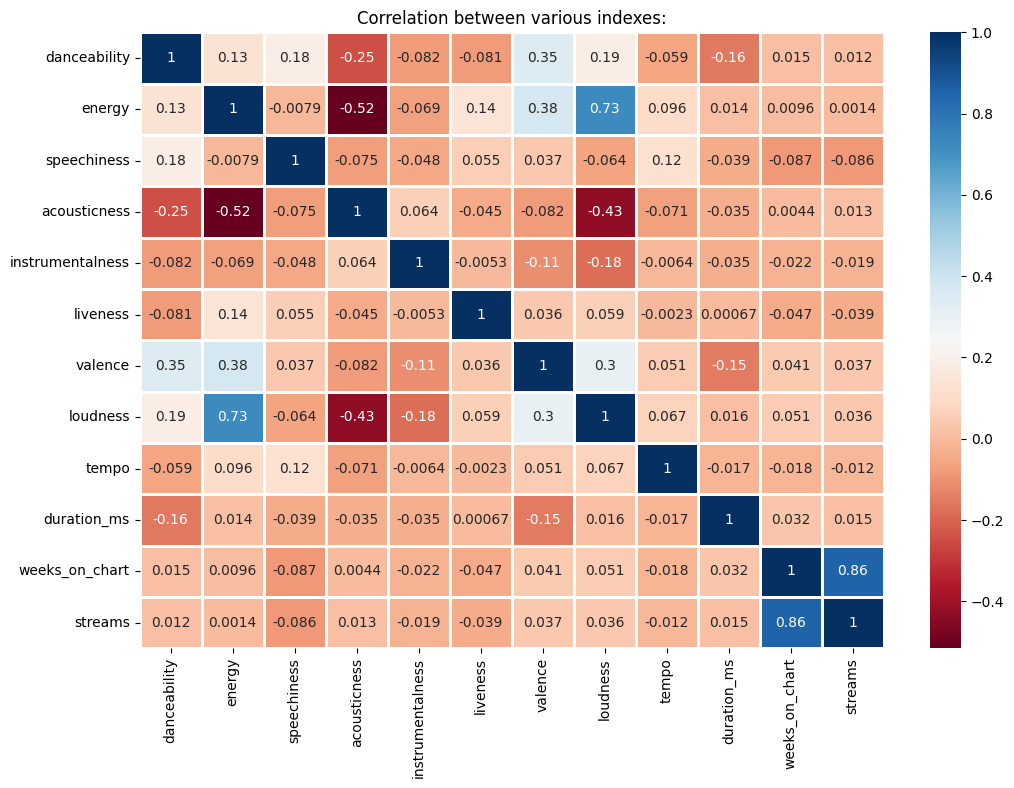

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cormatrix,annot=True,cmap="RdBu",linewidths=1)
plt.title("Correlation between various indexes:")
plt.show()

For example danceability of a song is directly proportional to the valence of the song and indirectly proportional to the acousticness of the song.

The relationship between weeks on chart and streams is also clearly visible the number of streams increase with the weeks on chart. (positive)

Energy of a song increases as loudness of the song increases and decreases with the acousticness of the song. (negative)

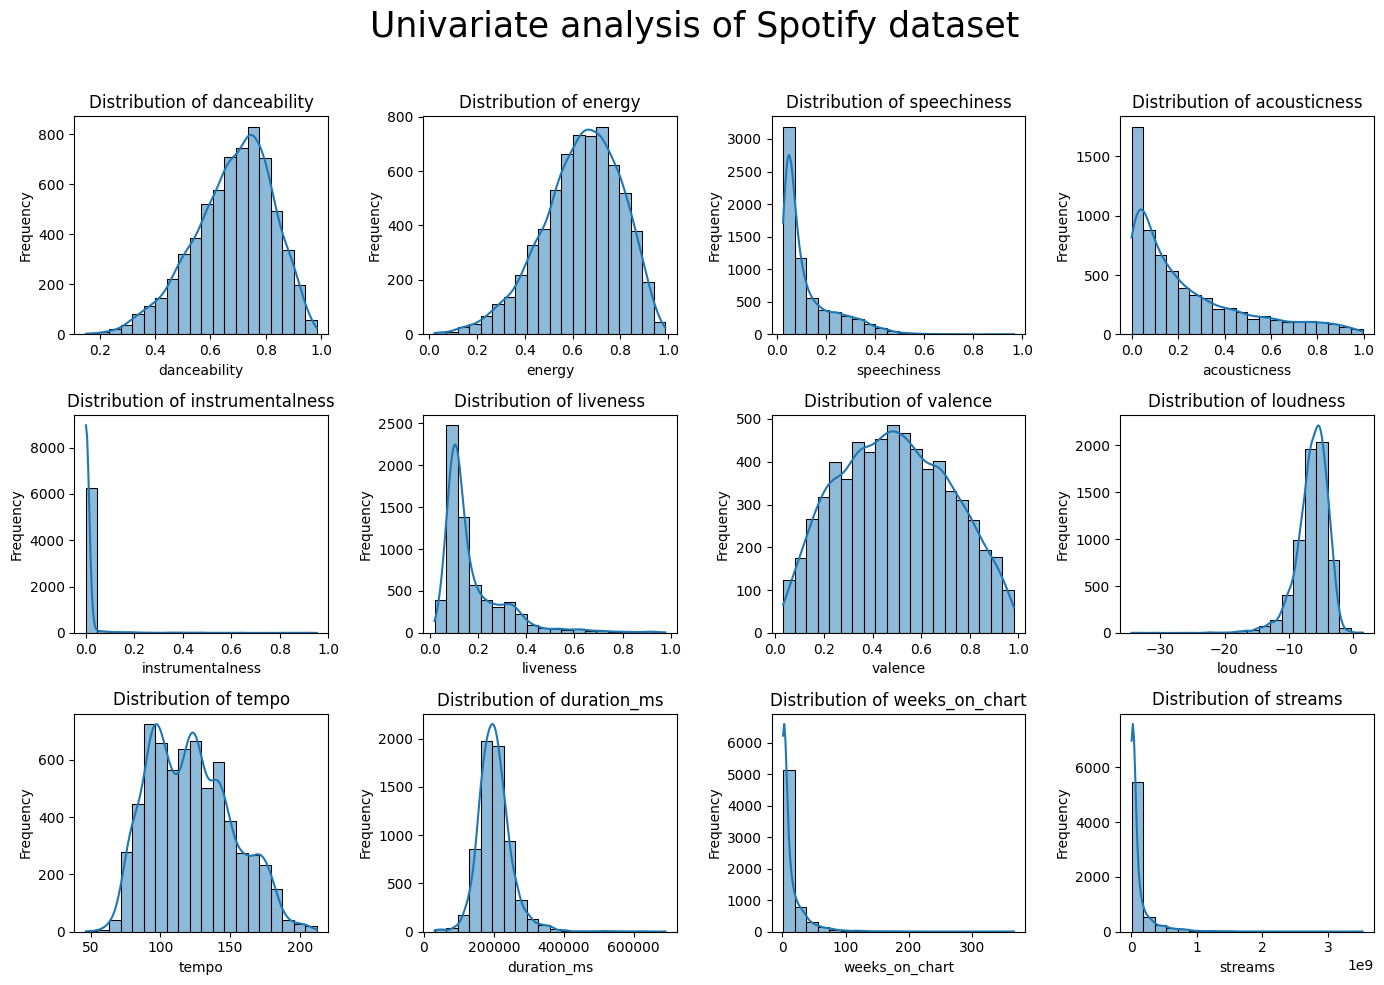

In [ ]:
fig,axes=plt.subplots(3,4, figsize=(14,10))
fig.suptitle("Univariate analysis of Spotify dataset", fontsize=25)
var= ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','loudness','tempo','duration_ms','weeks_on_chart','streams']
for ax,vr in zip(axes.flatten(),var):
  sns.histplot(df2[vr],kde=True,ax=ax,bins=20)
  ax.set_title(f'Distribution of {vr}')
  ax.set_xlabel(vr)
  ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Top 10 artists in Spotify with most no. of releases

<Axes: ylabel='count'>

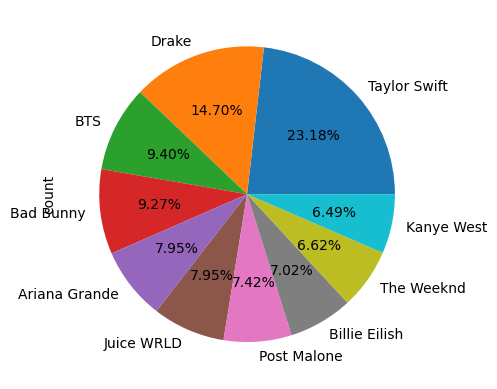

In [ ]:
spot['artist_names'].value_counts()[:10].plot(kind='pie',autopct='%0.2f%%')

Taylor Swift(175 songs) has the most number of song releases in Spotify.

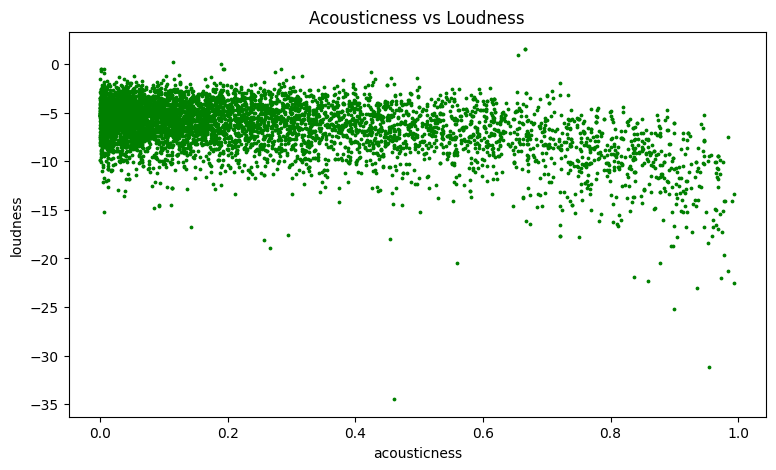

In [ ]:
d=spot['acousticness']
w=spot['loudness']
plt.figure(figsize=(9,5))
plt.scatter(d,w,color='green',s=3)
plt.xlabel('acousticness')
plt.ylabel('loudness')
plt.title('Acousticness vs Loudness')
plt.show()

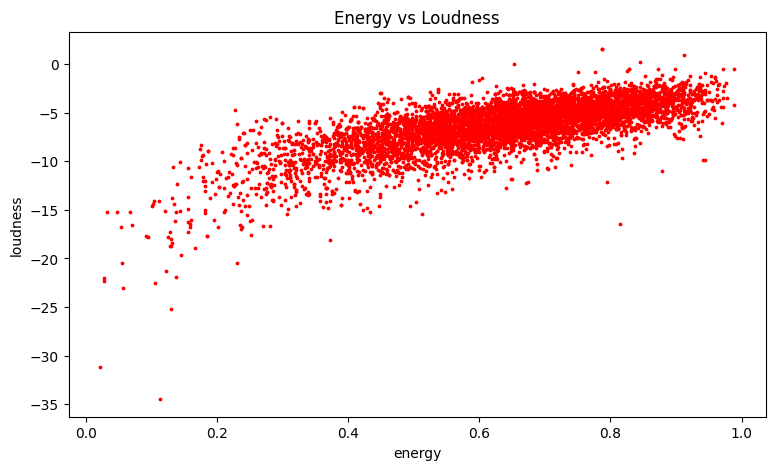

In [ ]:
d=spot['energy']
w=spot['loudness']
plt.figure(figsize=(9,5))
plt.scatter(d,w,color='red',s=3)
plt.xlabel('energy')
plt.ylabel('loudness')
plt.title('Energy vs Loudness')
plt.show()

Through this Scatter graphs we can clearly understand the correlation between loudness and acousticness which is a negative correlation... that is their values are indirectly proportional to each other but on the other hand when we compare energy v loudness they have a positively correlated values that is they are values are directly proportional to each other


In [ ]:
spot.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


If we focus on the standard deviation row, We see instrumentalness having the least standard deviation indicating that the values of this attribute tend to be the most closer to the mean. On the other hand if we see the duration of songs, it holds the highest standard deviation indicating that its values  spread out over a wide range

//50%tile is the median of the data here

#Outlier checking

The chance of getting an outlier depends upon the difference between 25 percentile and minimum value as well as 75% Percentile and maximum value. The more prominent the difference is,chances of getting an outlier increases

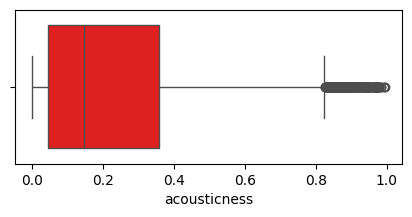

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x='acousticness',data=spot,color='red')
plt.show()

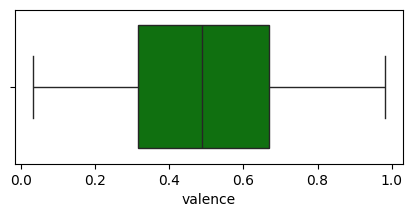

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x='valence',data=spot,color='green')
plt.show()

Valence attribute has no outliers

#Skewness

In [ ]:
spot['danceability'].mode()

0    0.746
Name: danceability, dtype: float64

In [ ]:
spot['danceability'].median()

0.698

In [ ]:
spot['danceability'].mean()

0.6817306924612314

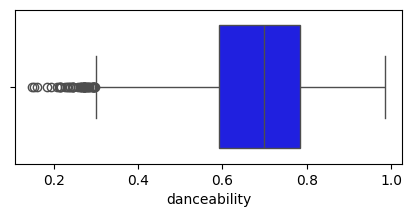

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x='danceability',data=spot,color='blue')
plt.show()

Danceability shows negetive skewness(asymmetry) where mean < median < mode.

In [ ]:
dan=pd.DataFrame(spot['danceability'])
dan


,danceability
0,0.748
1,0.353
2,0.352
3,0.620
4,0.687
...,...
6508,0.615
6509,0.767
6510,0.924
6511,0.727


In [ ]:
dan.skew()

danceability   -0.520845
dtype: float64

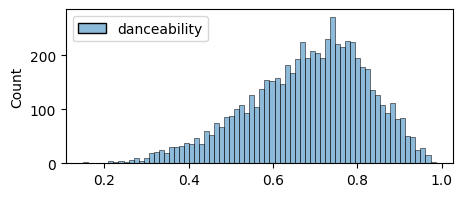

In [ ]:
plt.figure(figsize=(5,2))
sns.histplot(dan,bins=70)
plt.show()

#Testing Central Limit Theorem

In [ ]:
woc_table=pd.DataFrame(spot['weeks_on_chart'])
woc_table.head(3)

,weeks_on_chart
0,17
1,2
2,125


In [ ]:
np.mean(spot['weeks_on_chart'])

13.614923998157531

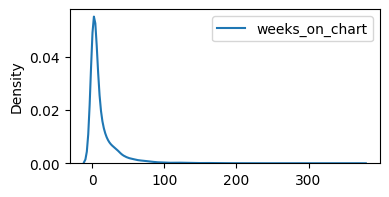

In [ ]:
plt.figure(figsize=(4,2))
sns.kdeplot(data=woc_table)
plt.show()

not a normal distribution

In [ ]:
sam_mean=[]
for no_sample in range(100):
  sample_data=[]
  for data in range(100):
    sample_data.append(np.random.choice(spot['weeks_on_chart']))
  sam_mean.append(np.mean(sample_data))

In [ ]:
sam_table=pd.DataFrame({"Sample_mean":sam_mean})
sam_table

,Sample_mean
0,14.82
1,15.35
2,11.17
3,12.19
4,11.57
...,...
95,17.75
96,14.59
97,13.79
98,14.10


In [ ]:
np.mean(sam_mean)

13.715699999999996

Mean of both curves are almost same, following Central Limit Theorem

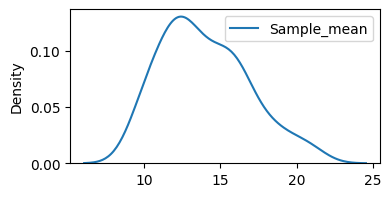

In [ ]:
plt.figure(figsize=(4,2))
sns.kdeplot(data=sam_table)
plt.show()

We get a normal distribution when we're using the concept of samples.The more number of samples we create the better the normal distribution curve will be

In [ ]:
(10*6500)/100

650.0

In [ ]:
np.random.choice(spot['weeks_on_chart'])

25